In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn.datasets.base import Bunch

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


N_SPLITS = 5

rng = np.random.RandomState(0)


folder_path = '../../../datalcdem/data/optima/dementia_18July/class_mild_mod_sev/'

d = pickle.load(open(folder_path + 'patient_data.pkl', 'rb'))

patient_data =  Bunch(data=d['data'], target=d['target'], target_name=d['target_names'], target_real=d['target_real'], class_names=d['class_names'])

data_p = patient_data.data
target_p = patient_data.target
target_real_p = patient_data.target_real
target_names_p = patient_data.target_name
class_names_p = patient_data.class_names
display(data_p.shape, target_p.shape, target_real_p.shape, target_names_p.shape, data_p[0:5], target_p[0:5], target_real_p[0:5], target_names_p[0:5], class_names_p)


X_full, y_full = data_p, target_p
print (X_full.shape)
print (y_full.shape)

X_missing, y_missing = X_full, y_full

br_estimator = BayesianRidge()

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()

for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    #DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0)
    #KNeighborsRegressor(n_neighbors=15),
    #RandomForestClassifier()
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )

scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)

#

(130, 655)

(130,)

(130,)

(130,)

array([[ 0.,  1.,  0., ...,  0.,  0., 59.],
       [ 0.,  1.,  0., ..., nan, nan, nan],
       [ 0.,  1.,  0., ..., nan, nan, nan],
       [ 0.,  1.,  1., ..., nan, nan, nan],
       [ 0.,  1.,  0., ...,  0.,  0., 66.]])

array([2, 5, 3, 4, 0])

array([2, 5, 3, 4, 0])

array(['Normal', 'Fast_MiS', 'Normal_MiS', 'Fast', 'Slow'], dtype=object)

['Slow', 'Slow_MiS', 'Normal', 'Normal_MiS', 'Fast', 'Fast_MiS']

(130, 655)
(130,)


/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/home/vyasa/pythonEn

SimpleImputer     mean                   2.603716
                  median                 2.618604
IterativeImputer  BayesianRidge          2.255838
                  ExtraTreesRegressor    2.261531
dtype: float64
SimpleImputer     mean                   0.472534
                  median                 0.472851
IterativeImputer  BayesianRidge          0.648746
                  ExtraTreesRegressor    0.654867
dtype: float64


/home/vyasa/pythonEnv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  # Remove the CWD from sys.path while we load stuff.


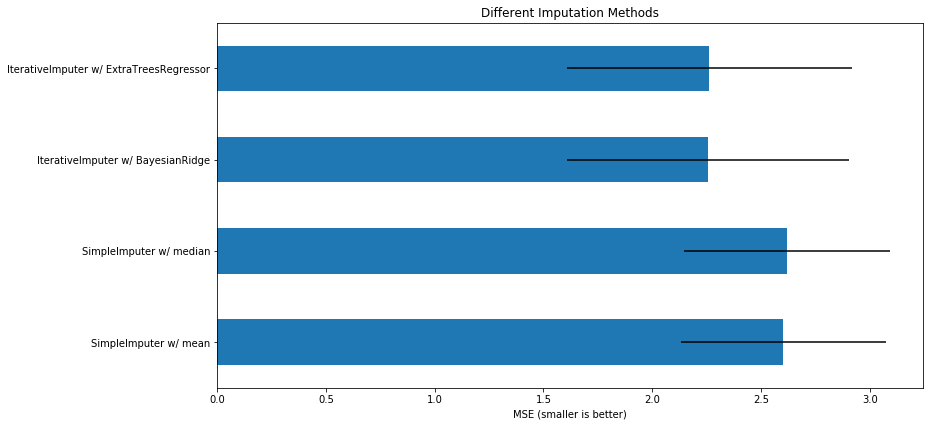

In [2]:
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
print (means)
print (errors)
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('Different Imputation Methods')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.get_values()])
plt.tight_layout(pad=1)
plt.show()

In [3]:
print (means)
'''SimpleImputer     mean                      2.603716
                  median                    2.618604
IterativeImputer  BayesianRidge             2.262808
                  DecisionTreeRegressor     2.577321
                  ExtraTreesRegressor       2.217406
                  KNeighborsRegressor       2.492845
                  RandomForestClassifier    2.626771
dtype: float64
SimpleImputer     mean                      0.472534
                  median                    0.472851
IterativeImputer  BayesianRidge             0.646232
                  DecisionTreeRegressor     0.457760
                  ExtraTreesRegressor       0.627892
                  KNeighborsRegressor       0.585085
                  RandomForestClassifier    0.476874'''

SimpleImputer     mean                   2.603716
                  median                 2.618604
IterativeImputer  BayesianRidge          2.255838
                  ExtraTreesRegressor    2.261531
dtype: float64


'SimpleImputer     mean                      2.603716\n                  median                    2.618604\nIterativeImputer  BayesianRidge             2.262808\n                  DecisionTreeRegressor     2.577321\n                  ExtraTreesRegressor       2.217406\n                  KNeighborsRegressor       2.492845\n                  RandomForestClassifier    2.626771\ndtype: float64\nSimpleImputer     mean                      0.472534\n                  median                    0.472851\nIterativeImputer  BayesianRidge             0.646232\n                  DecisionTreeRegressor     0.457760\n                  ExtraTreesRegressor       0.627892\n                  KNeighborsRegressor       0.585085\n                  RandomForestClassifier    0.476874'